In [1]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def extract_log(name = 'test.out'):
    data = []
    with open(name) as f:
        for line in f.readlines():
            temp = line.split()
            data.append(temp)

    #%%
    loss = []
    miou = []
    eloss = []
    emiou = []

    eval = False
    L = False
    M = False
    cont = False
    for line in data:
        for word in line:
            if word == 'evaluate]':
                eval = True
                cont = True
            if cont == False:
                continue
            if word == 'Loss:':
                L = True
                continue
            if word == 'MIoU:':
                M = True
                continue
            if L == True and eval == True:
                eloss.append(float(word))
                L = False
            if M == True and eval == True:
                emiou.append(float(word[:-1]))
                M = False
                eval = False
            if L == True and eval != True:
                loss.append(float(word))
                L = False
            if M == True and eval != True:
                miou.append(float(word[:-1]))
                M = False
                cont = False





    return loss, miou, eloss, emiou

In [4]:
loss, miou, eloss, emiou = extract_log('../log/CVFPN.out')
print(len(loss))
print(len(miou))

49
49


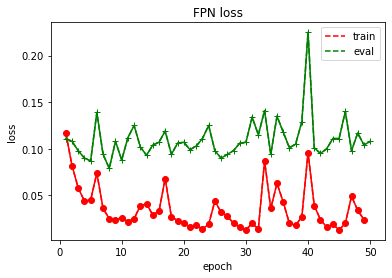

In [6]:
data1 = loss
data2 = eloss
task = 'FPN'
model1 = 'train'
model2 = 'eval'
type = 'loss'
plt.figure()
epoch_len = len(data1)
x1=range(1, epoch_len+1)
y1=data1
x2=[]
y2=[]
if data2 is not None:
    y2 = data2
    x2 = range(1, len(y2)+1)
x3=[]
y3=[]
#x=np.arange(20,350)
l1=plt.plot(x1,y1,'r--',label=model1)
if data2 is not None:
    l2=plt.plot(x2,y2,'g--',label=model2)
#l3=plt.plot(x3,y3,'b--',label='type3')
plt.plot(x1,y1,'ro-',x2,y2,'g+-',x3,y3,'b^-')
plt.title(task + ' ' + type)
plt.xlabel('epoch')
plt.ylabel(type)
plt.legend()
if model2 is not None:
    png_name = task + '_' + type + '_' + model1 + '_' + model2
else:
    png_name = task + '_' + type + '_' + model1
plt.savefig(png_name+'.png')
plt.show()



